In [165]:
import pandas as pd 
import numpy as np 

In [166]:

df=pd.read_csv("Housing.csv")
df

,price,area,length,width,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1465896,244316,593,412,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,3123904,390488,734,532,4,4,4,yes,no,no,no,yes,3,no,furnished
2,1519896,379974,498,763,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,1152112,288028,382,754,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,887292,221823,503,441,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,377880,188940,470,402,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,483084,241542,497,486,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,364276,182138,374,487,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,734160,367080,570,644,3,1,1,no,no,no,no,no,0,no,furnished


In [167]:
col1=df["length"]
col1

0      593
1      734
2      498
3      382
4      503
      ... 
540    470
541    497
542    374
543    570
544    527
Name: length, Length: 545, dtype: int64

In [187]:
import statistics
dev=statistics.stdev(col1)
dev

148.35440446467734

In [168]:
mean_of_col=col1.mean()
m

539.1357798165137

In [184]:
import scipy.stats as stats


zscores = stats.zscore(col1)
zscores


0      0.363412
1      1.314711
2     -0.277535
3     -1.060165
4     -0.243801
         ...   
540   -0.466446
541   -0.284282
542   -1.114139
543    0.208235
544   -0.081878
Name: length, Length: 545, dtype: float64

In [ ]:
var_of_col=col1.var()
var_of_col

In [170]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier  
from sklearn import datasets
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [171]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df=df.apply(le.fit_transform)

In [172]:
model=KNeighborsClassifier()
df1=df.drop(columns=["furnishingstatus"], axis=1)
labels=df["furnishingstatus"]
labels

0      0
1      0
2      1
3      0
4      0
      ..
540    2
541    1
542    2
543    0
544    2
Name: furnishingstatus, Length: 545, dtype: int32

In [173]:
X_train, X_test, y_train, y_test = train_test_split(df1,labels, test_size=0.33, random_state=42)

In [174]:
model.fit(X_train,y_train)
pred=model.predict(X_test)
print("accuracy ",accuracy_score(y_test,pred)*100)

accuracy  37.77777777777778


In [175]:
df1

,price,area,length,width,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,428,213,205,75,3,1,2,1,0,0,0,1,2,1
1,536,431,297,158,3,3,3,1,0,0,0,1,3,0
2,437,425,144,311,2,1,1,1,0,1,0,0,2,1
3,365,298,59,303,3,1,1,1,0,1,0,1,3,1
4,263,157,147,94,3,0,1,1,1,1,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,46,100,122,67,1,0,0,1,0,1,0,0,2,0
541,94,202,143,126,2,0,0,0,0,0,0,0,0,0
542,39,84,52,127,1,0,0,1,0,0,0,0,0,0
543,207,413,193,233,2,0,0,0,0,0,0,0,0,0


In [176]:
labels=df["furnishingstatus"]

In [177]:

df=df.drop(columns=["furnishingstatus"], axis=1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(df)
d = pd.DataFrame(scaled)
d.columns = df.columns
d

,price,area,length,width,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,0.991561,-0.372541,0.371266,-0.933826,1.403419,1.421812,1.378217,0.405623,-0.465315,-0.734539,-0.219265,1.472618,1.517692,1.804941
1,1.678026,1.016888,1.278266,-0.074138,1.403419,5.405809,2.532024,0.405623,-0.465315,-0.734539,-0.219265,1.472618,2.679409,-0.554035
2,1.048766,0.978646,-0.230115,1.510588,0.047278,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,1.804941
3,0.591123,0.169208,-1.068104,1.427726,1.403419,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,1.472618,2.679409,1.804941
4,-0.057205,-0.729459,-0.200539,-0.737030,1.403419,-0.570187,0.224410,0.405623,2.149083,1.361397,-0.219265,1.472618,1.517692,-0.554035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,-1.436492,-1.092750,-0.447006,-1.016688,-1.308863,-0.570187,-0.929397,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,-0.554035
541,-1.131397,-0.442650,-0.239973,-0.405584,0.047278,-0.570187,-0.929397,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035
542,-1.480985,-1.194727,-1.137114,-0.395226,-1.308863,-0.570187,-0.929397,0.405623,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035
543,-0.413150,0.902164,0.252961,0.702688,0.047278,-0.570187,-0.929397,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035


In [178]:
d

,price,area,length,width,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,0.991561,-0.372541,0.371266,-0.933826,1.403419,1.421812,1.378217,0.405623,-0.465315,-0.734539,-0.219265,1.472618,1.517692,1.804941
1,1.678026,1.016888,1.278266,-0.074138,1.403419,5.405809,2.532024,0.405623,-0.465315,-0.734539,-0.219265,1.472618,2.679409,-0.554035
2,1.048766,0.978646,-0.230115,1.510588,0.047278,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,1.804941
3,0.591123,0.169208,-1.068104,1.427726,1.403419,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,1.472618,2.679409,1.804941
4,-0.057205,-0.729459,-0.200539,-0.737030,1.403419,-0.570187,0.224410,0.405623,2.149083,1.361397,-0.219265,1.472618,1.517692,-0.554035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,-1.436492,-1.092750,-0.447006,-1.016688,-1.308863,-0.570187,-0.929397,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,-0.554035
541,-1.131397,-0.442650,-0.239973,-0.405584,0.047278,-0.570187,-0.929397,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035
542,-1.480985,-1.194727,-1.137114,-0.395226,-1.308863,-0.570187,-0.929397,0.405623,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035
543,-0.413150,0.902164,0.252961,0.702688,0.047278,-0.570187,-0.929397,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035


In [179]:
model=KNeighborsClassifier()


labels
df2

,price,area,length,width,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,428,213,205,75,3,1,2,1,0,0,0,1,2,1
1,536,431,297,158,3,3,3,1,0,0,0,1,3,0
2,437,425,144,311,2,1,1,1,0,1,0,0,2,1
3,365,298,59,303,3,1,1,1,0,1,0,1,3,1
4,263,157,147,94,3,0,1,1,1,1,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,46,100,122,67,1,0,0,1,0,1,0,0,2,0
541,94,202,143,126,2,0,0,0,0,0,0,0,0,0
542,39,84,52,127,1,0,0,1,0,0,0,0,0,0
543,207,413,193,233,2,0,0,0,0,0,0,0,0,0


In [180]:
X_train, X_test, y_train, y_test = train_test_split(d,labels, test_size=0.33, random_state=42)

In [181]:
model.fit(X_train,y_train)
pred=model.predict(X_test)
print("accuracy ",accuracy_score(y_test,pred)*100)

accuracy  37.77777777777778


In [191]:
d.cov()

,price,area,length,width,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
price,1.001838,0.629890,0.446205,0.446675,0.389715,0.261957,0.728511,0.034182,0.014082,-0.138315,0.037754,0.169472,-0.063077,-0.008517
area,0.629890,1.001838,0.696455,0.679323,0.032771,0.057893,-0.000827,-0.052010,-0.011296,-0.049584,0.001328,-0.016301,-0.136905,-0.052091
length,0.446205,0.696455,1.001838,-0.020552,0.069663,0.039449,0.007699,-0.049413,0.026670,-0.018771,-0.052108,0.089191,-0.032612,0.002963
width,0.446675,0.679323,-0.020552,1.001838,-0.001007,0.032442,0.006958,-0.026175,-0.039141,-0.052682,0.052427,-0.091036,-0.135316,-0.074567
bedrooms,0.389715,0.032771,0.069663,-0.001007,1.001838,0.374618,0.409315,-0.012055,0.080697,0.097491,0.046134,0.160898,0.139526,0.079168
bathrooms,0.261957,0.057893,0.039449,0.032442,0.374618,1.001838,0.326764,0.042476,0.126701,0.102293,0.067283,0.187259,0.177822,0.063588
stories,0.728511,-0.000827,0.007699,0.006958,0.409315,0.326764,1.001838,0.121930,0.043618,-0.172711,0.018881,0.294142,0.045631,0.044507
mainroad,0.034182,-0.052010,-0.049413,-0.026175,-0.012055,0.042476,0.121930,1.001838,0.092507,0.044083,-0.011803,0.105617,0.204808,0.200243
guestroom,0.014082,-0.011296,0.026670,-0.039141,0.080697,0.126701,0.043618,0.092507,1.001838,0.372750,-0.010327,0.138433,0.037535,0.161193
basement,-0.138315,-0.049584,-0.018771,-0.052682,0.097491,0.102293,-0.172711,0.044083,0.372750,1.001838,0.004393,0.047428,0.051592,0.228502


In [190]:
d.corr()

,price,area,length,width,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
price,1.000000,0.628734,0.445386,0.445856,0.389000,0.261477,0.727175,0.034119,0.014056,-0.138061,0.037685,0.169161,-0.062961,-0.008501
area,0.628734,1.000000,0.695177,0.678076,0.032711,0.057787,-0.000825,-0.051915,-0.011275,-0.049493,0.001326,-0.016271,-0.136654,-0.051996
length,0.445386,0.695177,1.000000,-0.020515,0.069535,0.039376,0.007684,-0.049323,0.026621,-0.018737,-0.052012,0.089027,-0.032552,0.002958
width,0.445856,0.678076,-0.020515,1.000000,-0.001005,0.032383,0.006945,-0.026127,-0.039069,-0.052585,0.052331,-0.090869,-0.135068,-0.074430
bedrooms,0.389000,0.032711,0.069535,-0.001005,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023
bathrooms,0.261477,0.057787,0.039376,0.032383,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472
stories,0.727175,-0.000825,0.007684,0.006945,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425
mainroad,0.034119,-0.051915,-0.049323,-0.026127,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876
guestroom,0.014056,-0.011275,0.026621,-0.039069,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897
basement,-0.138061,-0.049493,-0.018737,-0.052585,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083


In [194]:
col1=d["length"]
col2=d["area"]
correlation=col1.corr(col2)
correlation

0.6951772708396773

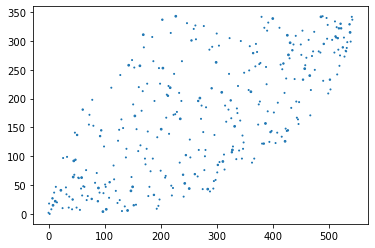

In [200]:
import matplotlib.pyplot as plt
plt.scatter(df['area'] , df['length'],df["stories"])

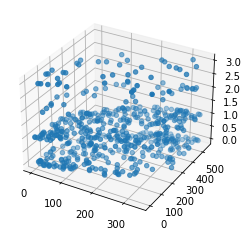

In [197]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(df['length'],df['area'] , df['stories'] )

In [201]:
plt.matshow(correlation)

ValueError: not enough values to unpack (expected 2, got 0)